# ЛР3

# Проверка статистических гипотез о виде закона распределения

In [1]:
from random import uniform
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Y(x):
    return 2 / (2 + x)

A = -1
B = 5

Теоритическая плотность распределения 

In [3]:
def f(x):
    if A <= x <= B:
        return 1 / (B - A)
    else:
        return 0

def g(y):
    return f(2 / y - 2) * (2 / y**2) 

Теоритическая функция распределения

In [4]:
def G(y):
    if y < 2 / 7:
        return 0
    elif y > 2:
        return 1
    else:
        return 1 / 3 * (-(1 / y) + 3.5)

## 1

## Критерий Пирсона

In [5]:
n = 200
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 4) for i in range(n)])
print(x_list)

[0.2873, 0.2879, 0.2889, 0.2913, 0.2913, 0.2917, 0.293, 0.2934, 0.294, 0.2941, 0.2945, 0.2948, 0.2949, 0.2953, 0.2966, 0.2973, 0.2986, 0.2988, 0.2993, 0.3009, 0.3014, 0.3028, 0.3029, 0.3032, 0.3036, 0.3058, 0.3067, 0.3118, 0.3128, 0.313, 0.313, 0.3133, 0.3168, 0.3171, 0.3207, 0.3229, 0.3297, 0.3339, 0.334, 0.3374, 0.3376, 0.3385, 0.339, 0.3401, 0.3427, 0.3428, 0.3467, 0.3533, 0.3545, 0.3553, 0.3568, 0.3599, 0.3607, 0.3622, 0.3625, 0.3632, 0.3643, 0.3651, 0.3681, 0.3697, 0.3732, 0.3744, 0.3744, 0.3751, 0.3818, 0.3847, 0.3848, 0.3859, 0.3874, 0.3885, 0.3898, 0.39, 0.3919, 0.3925, 0.3962, 0.4006, 0.4015, 0.4041, 0.4049, 0.41, 0.4135, 0.4159, 0.4256, 0.4257, 0.4388, 0.4394, 0.4402, 0.4427, 0.4447, 0.4464, 0.4474, 0.4482, 0.4556, 0.4581, 0.4617, 0.4637, 0.4642, 0.4734, 0.475, 0.4802, 0.4819, 0.4863, 0.4877, 0.4907, 0.4918, 0.492, 0.5025, 0.5082, 0.5152, 0.5175, 0.5187, 0.5238, 0.5316, 0.5318, 0.5322, 0.5329, 0.5397, 0.5457, 0.5468, 0.5526, 0.5549, 0.555, 0.5554, 0.5612, 0.5654, 0.5696, 0.59

In [6]:
m = int(np.log2(n)) + 1
m

8

In [7]:
v = n // m
v

25

In [8]:
a = []
b = []
i = 0
for _ in range(m):
        a.append(x_list[i])
        b.append(x_list[i + v - 1])
        i += v - 1
intervals = [(i, j) for (i, j) in zip(a, b)]

h = [j - i for (i, j) in zip(a, b)]

f_star = [v / (n * i) for i in h]

wi = [0]
for i in range(m):
    wi.append(round(wi[i] + v / n, 4))
    
data = {
    'Ai': a,
    'Bi': b,
    'h': h,
    'f*': f_star,
    'w': wi[1:]
}
pd.DataFrame(data)

,Ai,Bi,h,f*,w
0,0.2873,0.3036,0.0163,7.668712,0.125
1,0.3036,0.3545,0.0509,2.455796,0.250
2,0.3545,0.3919,0.0374,3.342246,0.375
3,0.3919,0.4642,0.0723,1.728907,0.500
4,0.4642,0.5549,0.0907,1.378170,0.625
5,0.5549,0.7306,0.1757,0.711440,0.750
6,0.7306,1.0762,0.3456,0.361690,0.875
7,1.0762,1.8553,0.7791,0.160442,1.000


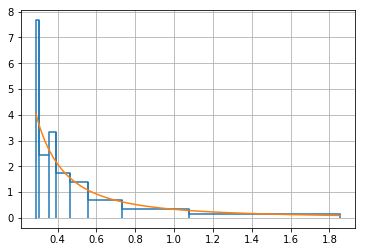

In [9]:
x_plot = a[:]
x_plot.append(b[-1])
y_plot = f_star[:]
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.vlines(x_plot, min(y_plot), y_plot, colors='C0')
x_lin = np.linspace(min(x_plot), max(x_plot), 70)
plt.plot(x_lin, list(map(g, x_lin)))
plt.grid(True)
plt.show()

In [10]:
p_star = v / n
p_star

0.125

In [11]:
p = [G(b) - G(a) for a, b in intervals]
p

[0.06229152402671959,
 0.1576443901825641,
 0.08973437545174612,
 0.1324758281086001,
 0.11737245037468208,
 0.14446282857955262,
 0.1465142355622303,
 0.1300663093771358]

In [12]:
chi_square = sum((v - n * pi)**2 / (n * pi) for pi in p)
chi_square

18.128737844477147

In [13]:
alpha = 0.01
k = m - 1
k

7

In [14]:
from scipy.stats import chi2
t_chi = chi2.isf(alpha, k)
t_chi

18.475306906582365

In [15]:
# за гипотезу принимаем f(x) = f0(x), где f0 плотность вероятности теоретического закона распределения
if t_chi > chi_square:
    print("Нет основнаний отклонять гипотезу")
else:
    print("Гипотизу следует оклонить")

Нет основнаний отклонять гипотезу


## 2

## Критерий Колмогорова

In [16]:
n = 5
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.303, 0.404, 0.406, 0.526, 0.658]


In [17]:
counts = dict(Counter(x_list))
freq = [round(i / n, 3) for i in counts.values()]
ys = [0]
for k, i in enumerate(counts.values()):
    ys.append(ys[k] + i)
star_f = [round(i / n, 3) for i in ys]
print(star_f)

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]


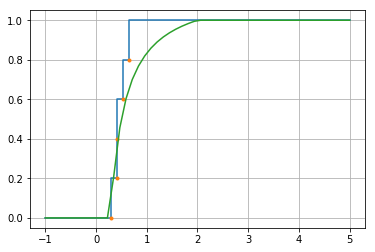

In [18]:
x_listt = sorted(list(set(x_list[:])))
x_plot = x_listt[:]
y_plot = star_f[:]
x_plot.insert(0, A)
x_plot.append(B)
y_plot.insert(0, 0)
plt.step(x_plot, y_plot)
plt.plot(x_plot[1:-1], y_plot[1:-1], '.')
x_lin = np.linspace(min(x_plot), max(x_plot), 50)
plt.plot(x_lin, list(map(G, x_lin)))
plt.grid(True)
plt.show()

In [19]:
result = []
for i, x in enumerate(x_list):
    d_plus = abs(G(x) - star_f[i])
    d_minus = abs(G(x) - star_f[i + 1])
    result.append(max(d_plus, d_minus))
max_delta = round(max(result), 2)
max_delta

0.34

In [20]:
e_lambda = round(np.sqrt(n) * max_delta, 2)
e_lambda

0.76

![table](img/kolmogorov.png)

In [21]:
# за гипотезу принимаем F(x) = F0(x), где F0 - теоретическая функция распределения
t_lambda = 1.60
if e_lambda < t_lambda:
    print("Гипотеза принимается, но она может быть не верна")
else:
    print("Гипотеза отклоняется")

Гипотеза принимается, но она может быть не верна


## 3

## Критерий Мизеса

In [22]:
n = 50
X = sorted(round(uniform(0, 1) * (B - A) + A, 4) for _ in range(n))
x_list = sorted([round(Y(X[i]), 3) for i in range(n)])
print(x_list)

[0.289, 0.291, 0.292, 0.295, 0.299, 0.31, 0.318, 0.32, 0.328, 0.339, 0.34, 0.352, 0.353, 0.36, 0.386, 0.405, 0.416, 0.439, 0.451, 0.456, 0.507, 0.51, 0.537, 0.538, 0.548, 0.583, 0.623, 0.695, 0.727, 0.791, 0.797, 0.83, 0.874, 0.889, 0.905, 0.911, 0.92, 0.994, 1.002, 1.06, 1.074, 1.09, 1.234, 1.346, 1.371, 1.384, 1.41, 1.573, 1.645, 1.889]


In [23]:
# alpha: n*omega^2
mizes_table = {
    0.2: 0.241,
    0.1: 0.347,
    0.05: 0.461,
    0.03: 0.548,
    0.02: 0.62,
    0.01: 0.744,
    0.001: 1.168
}

In [24]:
fn = [(i - 0.5) / n for i in range(1, len(x_list) + 1)]
print(fn)

[0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63, 0.65, 0.67, 0.69, 0.71, 0.73, 0.75, 0.77, 0.79, 0.81, 0.83, 0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.97, 0.99]


In [25]:
n_omega_square = 1 / (12 * n) + sum((G(i) - fn[k])**2 for k, i in enumerate(x_list))
n_omega_square

0.2557826457088585

In [26]:
if n_omega_square < mizes_table[alpha]:
    print("Нет оснований отклонять гипотезу")
else:
    print("Гипотезу следует оклонить")

Нет оснований отклонять гипотезу
